# Stem Method Example 
This notebook is used to showcase the power of stem method, explained in detail in
"SKA Weak Lensing III: Added Value of Multi-Wavelength Synergies for the Mitigation of Systematics" by Camera et al. (https://arxiv.org/abs/1606.03451).
In case you notice any errors please raise an issue. If you want to contact me, please do so at nikolina.sarcevic@gmail.com

In [1]:
from hybrid_derivative_calculator import HybridDerivativeCalculator
from derivative_plotter import DerivativePlotter
import numpy as np

In [2]:
# Define functions to calculate derivatives of
functions_dict = {
    'linear': lambda x: 2 * x + 3,
    'quadratic': lambda x: x ** 2 - 4 * x + 2,
    'cubic': lambda x: 2 * x + x ** 3,
    'trigonometric': lambda x: np.sin(x),
    'exponential': lambda x: np.exp(x),
    'logarithmic': lambda x: np.log(x + 1) if x > 0 else 0  # Avoid log(0)
}

In [3]:
# Example usage
# Create a DerivativeCalculator object
# Choose a function and the central value 
calc = HybridDerivativeCalculator(functions_dict["cubic"], 10)
plotter = DerivativePlotter(functions_dict["cubic"], 10)
noise_std = 1.5  # Standard deviation of the noise
iterations = 1000  # Number of iterations to run

stem_derivative = calc.stem_method()
print(f"Stem Method Derivative: {stem_derivative:.2f}")
stencil_derivative = calc.five_point_stencil_method()
print(f"Five-Point Stencil Derivative: {stencil_derivative:.2f}")


Stem Method Derivative: 319.65
Five-Point Stencil Derivative: 302.00


/Users/niko/Documents/Research/Derivative-Calculator/hybrid_derivative_calculator.py:37: UserWarning: [stem_method] Function not smooth around x_center; excluding 0% offset.
  warnings.warn(message)
/Users/niko/Documents/Research/Derivative-Calculator/hybrid_derivative_calculator.py:37: UserWarning: [stem_method] Converged with spread 8.5073e-03
  warnings.warn(message)


/Users/niko/Documents/Research/Derivative-Calculator/hybrid_derivative_calculator.py:37: UserWarning: [stem_method] Converged with spread 8.3063e-03
  warnings.warn(message)
/Users/niko/Documents/Research/Derivative-Calculator/hybrid_derivative_calculator.py:37: UserWarning: [stem_method] Converged with spread 8.2387e-03
  warnings.warn(message)
/Users/niko/Documents/Research/Derivative-Calculator/hybrid_derivative_calculator.py:37: UserWarning: [stem_method] Converged with spread 7.4265e-03
  warnings.warn(message)
/Users/niko/Documents/Research/Derivative-Calculator/hybrid_derivative_calculator.py:37: UserWarning: [stem_method] Converged with spread 8.6022e-03
  warnings.warn(message)
/Users/niko/Documents/Research/Derivative-Calculator/hybrid_derivative_calculator.py:37: UserWarning: [stem_method] Converged with spread 7.3433e-03
  warnings.warn(message)
/Users/niko/Documents/Research/Derivative-Calculator/hybrid_derivative_calculator.py:37: UserWarning: [stem_method] Converged with

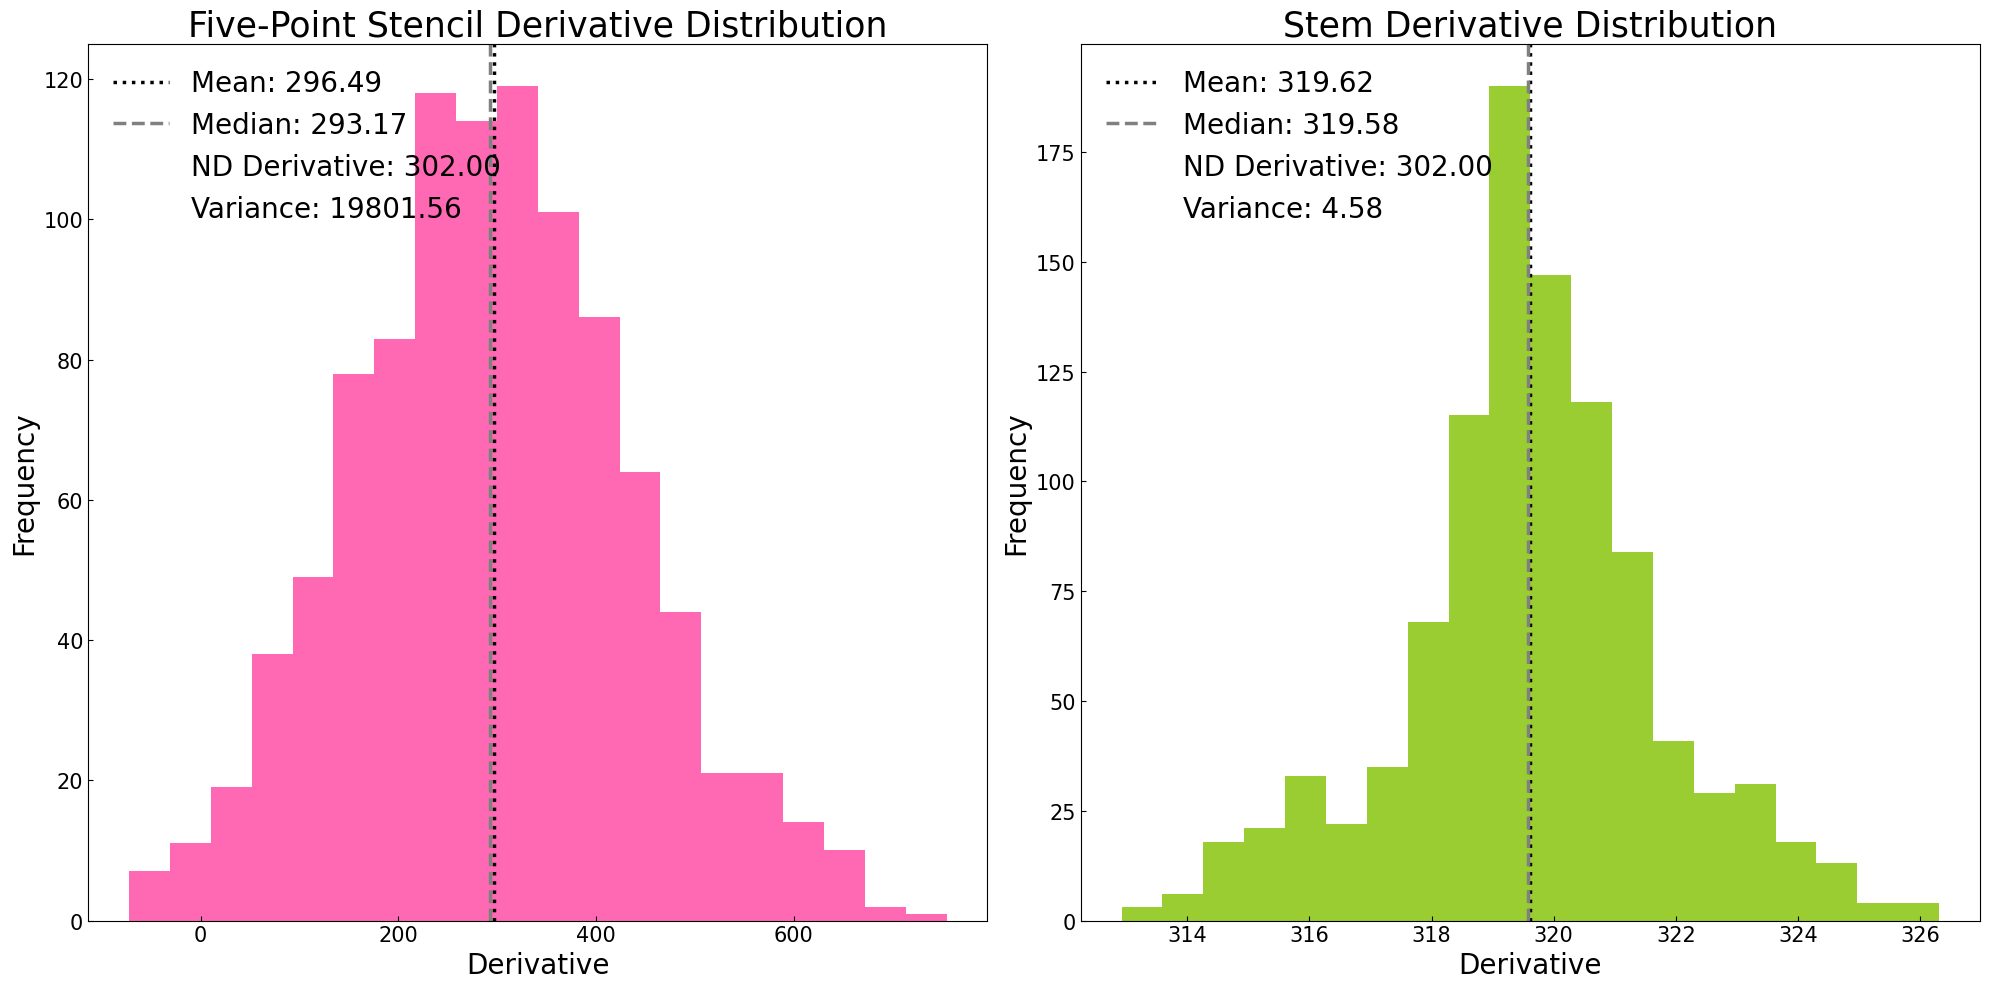

In [4]:
# Calculate derivatives with noise
# First use the 'five_point_stencil' method to calculate the derivatives
# Output will be a list of values, each value is the derivative calculated at a point
five_point_distr = calc.calculate_derivatives_with_output_noise(method='five_point_stencil',
                                                                iterations=iterations, 
                                                                noise_std=noise_std)
# Now use the 'stem' method to calculate the derivatives
# Output will be a list of values, each value is the derivative
stem_distr = calc.calculate_derivatives_with_output_noise(method='stem',
                                                          iterations=iterations,
                                                          noise_std=noise_std)

# Plot the distributions using the plot_derivative_distributions method
# Not that the noise is Gaussian so the distributions should be normal
# but the output will vary depending on the noise every time the code is run!!!
plotter.plot_derivative_distributions(five_point_distr,
                                   stem_distr, 
                                   method1_name='Five-Point Stencil',
                                   method2_name='Stem',
                                   bins=20)


/Users/niko/Documents/Research/Derivative-Calculator/hybrid_derivative_calculator.py:37: UserWarning: [stem_method] Function not smooth around x_center; excluding 0% offset.
  warnings.warn(message)
/Users/niko/Documents/Research/Derivative-Calculator/hybrid_derivative_calculator.py:37: UserWarning: [stem_method] Converged with spread 8.4139e-03
  warnings.warn(message)
/Users/niko/Documents/Research/Derivative-Calculator/hybrid_derivative_calculator.py:37: UserWarning: [stem_method] Converged with spread 7.5126e-03
  warnings.warn(message)
/Users/niko/Documents/Research/Derivative-Calculator/hybrid_derivative_calculator.py:37: UserWarning: [stem_method] Converged with spread 7.2049e-03
  warnings.warn(message)
/Users/niko/Documents/Research/Derivative-Calculator/hybrid_derivative_calculator.py:37: UserWarning: [stem_method] Converged with spread 7.4135e-03
  warnings.warn(message)
/Users/niko/Documents/Research/Derivative-Calculator/hybrid_derivative_calculator.py:37: UserWarning: [st

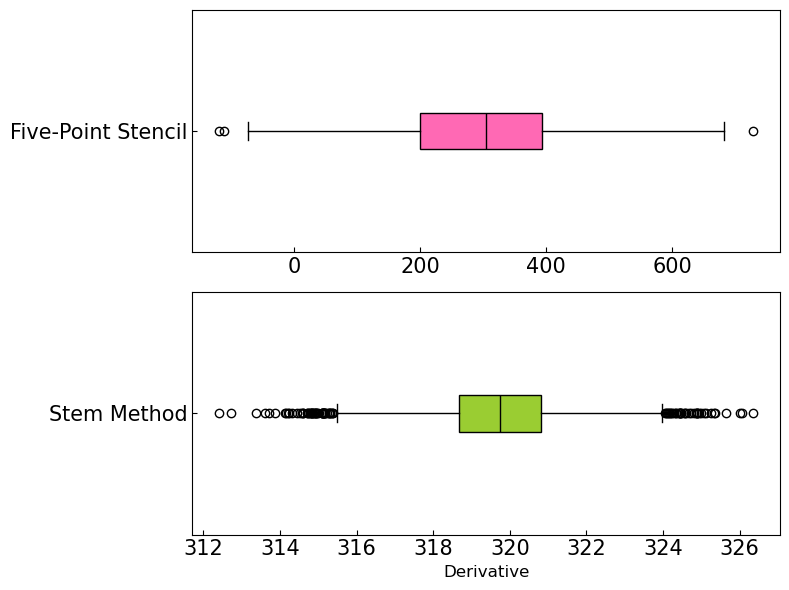

In [5]:
# Another way to demonstrate the power of the stem method visually is to 
# use a box plot. Use a built-in function
plotter.plot_derivatives_boxplot(iterations=iterations, noise_std=noise_std)


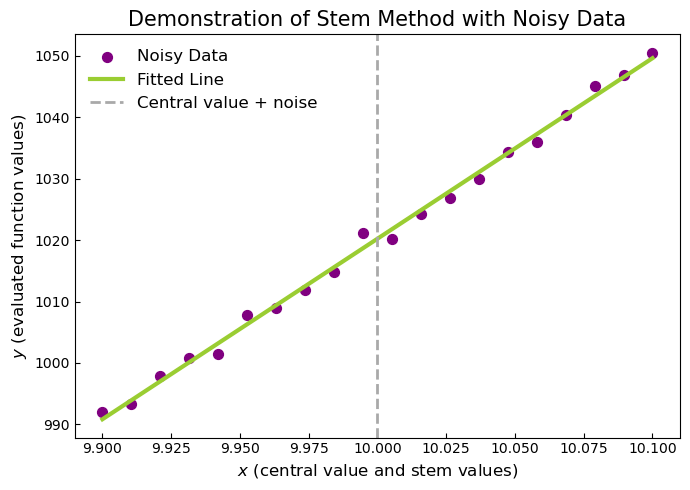

In [6]:
# Demonstrate the stem method using a built-in function
plotter.demonstrate_stem_method(num_points=20, noise_std=noise_std)
